In [1]:
import numpy as np

In [2]:
rundir='ConvergenceTest/'
runprefix='Run'
filename='/twostarsoneplanet'

In [3]:
tarr=[]
dtarr =[]
Linitarr=[]
pinitarr=[]
Einitarr=[]
deltaparr=[]
deltaEarr=[]
deltaLarr=[]
Lorbarr=[]
porbarr=[]
Eorbarr=[]

In [4]:
import csv
#varname=dtarr, L0arr
#typename ='dtarr.csv', 'L0arr.csv'
def load1D(rundir,runprefix,n,filename,typename):
    with open(rundir+runprefix+str(n)+filename+typename, newline='') as csvfile:
        varnamelist = list(csv.reader(csvfile))
    varname=np.zeros(len(varnamelist))
    count =0
    for row in varnamelist:
        for item in row:
            number = float(item)
            varname[count]=number
        count+=1
    return varname

In [5]:
import csv

def load2D(rundir,runprefix,n,filename, typename):
    with open(rundir+runprefix+str(n)+filename+typename,newline='') as csvfile:
        varnamelist = list(csv.reader(csvfile))
    varname=np.zeros([len(varnamelist),len(varnamelist[0])])
    rownum=0
    col=0
    for row in varnamelist:
        for item in row:
            number = float(item)
            varname[rownum][col]=number
            col+=1
        col=0
        rownum+=1
    return varname

In [6]:
import json
def loadJSON(rundir,runprefix,n,filename):
    
    paramsdict={}
    import json 
    with open(rundir+runprefix+str(n)+filename+'params.json') as jsonfile:
        paramsdict = json.load(jsonfile)
    return paramsdict

In [7]:
for i in range(3,9):
        t=load1D(rundir,runprefix,i,filename, 'dtarr.csv')
        tarr.append(t)
        #L0=load1D(rundir,runprefix,i,filename,'L0arr.csv')
        #L0arr.append(L0)
        deltaE = load2D(rundir,runprefix,i,filename,'deltaEarr.csv')
        deltaEarr.append(deltaE)
        deltaL = load2D(rundir,runprefix,i,filename,'deltaLarr.csv')
        deltaLarr.append(deltaL)
        deltap = load2D(rundir,runprefix,i,filename,'deltaparr.csv')
        deltaparr.append(deltap)
        #Einit=load1D(rundir,runprefix,i,filename,'Einitarr.csv')
        #Einitarr.append(Einit)
        #Linit=load2D(rundir,runprefix,i,filename,'Linitarr.csv')
        #Linitarr.append(Linit)
        #pinit=load2D(rundir,runprefix,i,filename,'pinitarr.csv')
        #pinitarr.append(pinit)
        #Lorb=load2D(rundir,runprefix,i,filename,'Lorbarr.csv')
        #Lorbarr.append(Lorb)
        #porb=load2D(rundir,runprefix,i,filename,'porbarr.csv')
        #porbarr.append(porb)
        #Eorb=load2D(rundir,runprefix,i,filename,'Eorbarr.csv')
        params=loadJSON(rundir,runprefix,i,filename)
        dt=params['dt']
        dtarr.append(dt)

In [8]:
dtarr

[0.05, 0.025, 0.0125, 0.2, 0.4, 0.1]

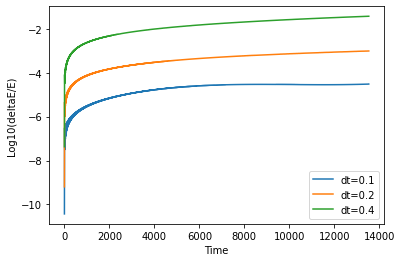

In [9]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
plt.xlabel('Time')
plt.ylabel('Log10(deltaE/E)')
plt.title('')
for i in [5,3,4]:
    temptimes=tarr[i]
    temp = deltaEarr[i]
    #print(i,len(temptimes),len(temp), max(temptimes))
    temparr=np.array(temp)
    #print(temparr[0:10])
    logtemparr=np.log10(temparr)
    ax.plot(temptimes,logtemparr,label='dt='+str(dtarr[i]))
ax.legend(loc="lower right")
plt.show()

-4 0.1 -3.321928094887362 6768.900000000001 89943.19632593227
-4 0.2 -2.321928094887362 6768.8 62866.66755469431
-4 0.4 -1.3219280948873622 6768.8 35791.46755469431


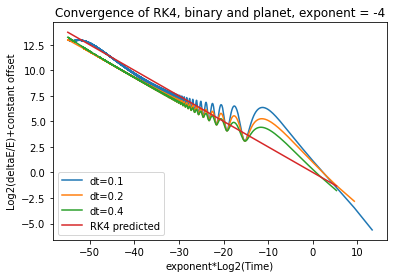

In [11]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
plt.xlabel('exponent*Log2(Time)')
plt.ylabel('Log2(deltaE/E)+constant offset')
power=-4
plt.title('Convergence of RK4, binary and planet, exponent = '+str(power))
count=0
offset=5.
for i in [5,3,4]:
    temptimes=tarr[i]
    temp = deltaEarr[i]
    #print(i,len(temptimes),len(temp), max(temptimes))
    temparr=np.array(temp)
    #print(temparr[0:10])
    logtemparr=np.log2(temparr)
    print(power, dtarr[i], np.log2(dtarr[i]),temptimes[int(len(temptimes)/2)],np.log2(dtarr[i])*power*temptimes[int(len(temptimes)/2)])
    ax.plot(power*np.log2(temptimes[1:]),logtemparr[1:]+offset*(2-count)+18,label='dt='+str(dtarr[i]))
    count +=1
ax.plot(power*np.log2(temptimes[1:]),np.log2(temptimes[1:]),label='RK4 predicted')
ax.legend(loc="lower left")
plt.show()

-4 0.1 -3.321928094887362 6768.900000000001 89943.19632593227
-4 0.2 -2.321928094887362 6768.8 62866.66755469431
-4 0.4 -1.3219280948873622 6768.8 35791.46755469431


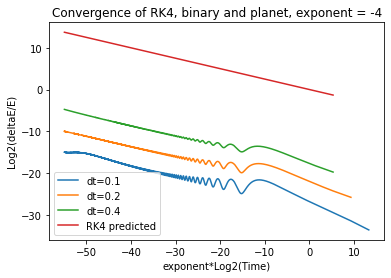

In [12]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
plt.xlabel('exponent*Log2(Time)')
plt.ylabel('Log2(deltaE/E)')
power=-4
plt.title('Convergence of RK4, binary and planet, exponent = '+str(power))
count=0
offset=0.
theoryoffset=0
for i in [5,3,4]:
    temptimes=tarr[i]
    temp = deltaEarr[i]
    #print(i,len(temptimes),len(temp), max(temptimes))
    temparr=np.array(temp)
    #print(temparr[0:10])
    logtemparr=np.log2(temparr)
    print(power, dtarr[i], np.log2(dtarr[i]),temptimes[int(len(temptimes)/2)],np.log2(dtarr[i])*power*temptimes[int(len(temptimes)/2)])
    ax.plot(power*np.log2(temptimes[1:]),logtemparr[1:]+offset*(2-count)+theoryoffset,label='dt='+str(dtarr[i]))
    count +=1
ax.plot(power*np.log2(temptimes[1:]),np.log2(temptimes[1:]),label='RK4 predicted')
ax.legend(loc="lower left")
plt.show()

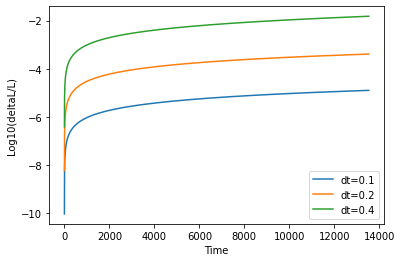

In [14]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
plt.xlabel('Time')
plt.ylabel('Log10(deltaL/L)')
plt.title('')
for i in [5,3,4]:
    temptimes=tarr[i]
    tempL = deltaLarr[i]
    #print(i,len(temptimes),len(temp), max(temptimes))
    temparrL=np.array(tempL)
    #print(temparr[0:10])
    logtemparrL=np.log10(temparrL[:,2])
    ax.plot(temptimes,logtemparrL,label='dt='+str(dtarr[i]))
ax.legend(loc="lower right")
plt.show()

-4 0.1 -3.321928094887362 6768.900000000001 89943.19632593227
-4 0.2 -2.321928094887362 6768.8 62866.66755469431
-4 0.4 -1.3219280948873622 6768.8 35791.46755469431


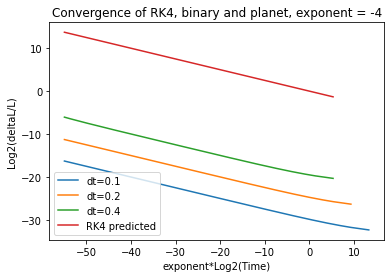

In [16]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
plt.xlabel('exponent*Log2(Time)')
plt.ylabel('Log2(deltaL/L)')
power=-4
plt.title('Convergence of RK4, binary and planet, exponent = '+str(power))
count=0
offset=0.
theoryoffset=0
for i in [5,3,4]:
    temptimes=tarr[i]
    tempL = deltaLarr[i]
    #print(i,len(temptimes),len(temp), max(temptimes))
    temparrL=np.array(tempL)
    #print(temparr[0:10])
    logtemparrL=np.log2(temparrL[:,2])
    print(power, dtarr[i], np.log2(dtarr[i]),temptimes[int(len(temptimes)/2)],np.log2(dtarr[i])*power*temptimes[int(len(temptimes)/2)])
    ax.plot(power*np.log2(temptimes[1:]),logtemparrL[1:]+offset*(2-count)+theoryoffset,label='dt='+str(dtarr[i]))
    count +=1
ax.plot(power*np.log2(temptimes[1:]),np.log2(temptimes[1:]),label='RK4 predicted')
ax.legend(loc="lower left")
plt.show()

-4 0.1 -3.321928094887362 6768.900000000001 89943.19632593227
-4 0.2 -2.321928094887362 6768.8 62866.66755469431
-4 0.4 -1.3219280948873622 6768.8 35791.46755469431


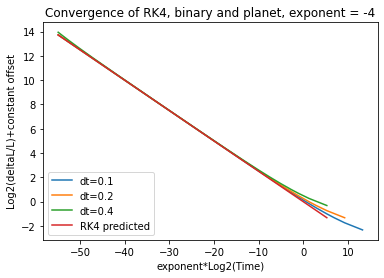

In [20]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
plt.xlabel('exponent*Log2(Time)')
plt.ylabel('Log2(deltaL/L)+constant offset')
power=-4
plt.title('Convergence of RK4, binary and planet, exponent = '+str(power))
count=0
offset=5.
theoryoffset=20.
for i in [5,3,4]:
    temptimes=tarr[i]
    tempL = deltaLarr[i]
    #print(i,len(temptimes),len(temp), max(temptimes))
    temparrL=np.array(tempL)
    #print(temparr[0:10])
    logtemparrL=np.log2(temparrL[:,2])
    print(power, dtarr[i], np.log2(dtarr[i]),temptimes[int(len(temptimes)/2)],np.log2(dtarr[i])*power*temptimes[int(len(temptimes)/2)])
    ax.plot(power*np.log2(temptimes[1:]),logtemparrL[1:]+offset*(2-count)+theoryoffset,label='dt='+str(dtarr[i]))
    count +=1
ax.plot(power*np.log2(temptimes[1:]),np.log2(temptimes[1:]),label='RK4 predicted')
ax.legend(loc="lower left")
plt.show()

<ipython-input-24-b7f7358f2d87>:12: RuntimeWarning: divide by zero encountered in log10
  logtemparrp=np.log10(temparrp[:,1])
<ipython-input-24-b7f7358f2d87>:12: RuntimeWarning: divide by zero encountered in log10
  logtemparrp=np.log10(temparrp[:,1])


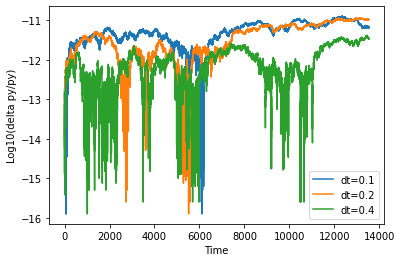

In [24]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
plt.xlabel('Time')
plt.ylabel('Log10(delta py/py)')
plt.title('')
for i in [5,3,4]:
    temptimes=tarr[i]
    tempp = deltaparr[i]
    #print(i,len(temptimes),len(temp), max(temptimes))
    temparrp=np.array(tempp)
    #print(temparr[0:10])
    logtemparrp=np.log10(temparrp[:,1])
    ax.plot(temptimes,logtemparrp,label='dt='+str(dtarr[i]))
ax.legend(loc="lower right")
plt.show()

<ipython-input-25-66712f791738>:12: RuntimeWarning: divide by zero encountered in log10
  logtemparrpx=np.log10(temparrpx[:,0])
<ipython-input-25-66712f791738>:12: RuntimeWarning: divide by zero encountered in log10
  logtemparrpx=np.log10(temparrpx[:,0])


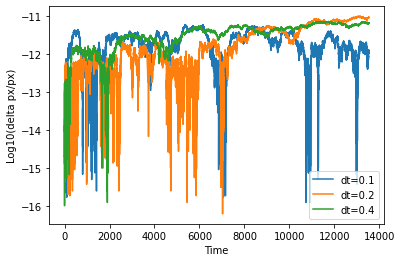

In [25]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
plt.xlabel('Time')
plt.ylabel('Log10(delta px/px)')
plt.title('')
for i in [5,3,4]:
    temptimes=tarr[i]
    temppx = deltaparr[i]
    #print(i,len(temptimes),len(temp), max(temptimes))
    temparrpx=np.array(temppx)
    #print(temparr[0:10])
    logtemparrpx=np.log10(temparrpx[:,0])
    ax.plot(temptimes,logtemparrpx,label='dt='+str(dtarr[i]))
ax.legend(loc="lower right")
plt.show()